# CDN Client Error dataset

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from google.colab import files

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Acquire data

The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [2]:
# Download the files (useful when using Google Colab)

uploaded = files.upload()

Saving CDN Client Error.csv to CDN Client Error.csv


In [3]:
# We verify that the files are correctly downloaded
!ls -l 

total 3180
-rw-r--r-- 1 root root 3248257 Nov 11 14:48 'CDN Client Error.csv'
drwxr-xr-x 1 root root    4096 Nov  1 13:35  sample_data


In [4]:
# Combine these datasets
df = pd.read_csv('CDN Client Error.csv')

## Describing data

### Features' names

In [5]:
print(df.columns.values)

['channel_id' 'timestamp' 'host_id' 'content_type' 'protocol' 'content_id'
 'geo_location' 'user_id']


In [6]:
df.shape

(88435, 8)

### Preview the data

In [7]:
df.head()

,channel_id,timestamp,host_id,content_type,protocol,content_id,geo_location,user_id
0,0,2088-05-13 09:19:11,156,8,1,NaN,1303,0.0
1,0,2088-05-13 08:58:12,156,8,1,NaN,1514,0.0
2,0,2088-05-13 09:39:05,156,2,1,NaN,1,13.0
3,0,2088-05-13 09:54:15,156,8,1,NaN,1,0.0
4,0,2088-05-13 10:04:32,156,8,1,NaN,1,0.0


In [8]:
df.tail()

,channel_id,timestamp,host_id,content_type,protocol,content_id,geo_location,user_id
88430,0,2088-05-19 04:18:41,156,2,1,NaN,1,13.0
88431,2,2088-05-19 01:53:43,123,4,1,NaN,1121,7.0
88432,0,2088-05-19 03:16:59,156,8,1,NaN,1,0.0
88433,0,2088-05-19 03:21:37,156,2,1,NaN,1,13.0
88434,1,2088-05-19 05:24:10,156,6,1,NaN,1586,54.0


In [9]:
#Visualizing some random data in the dataset
df.take(np.random.permutation(len(df))[:5])

,channel_id,timestamp,host_id,content_type,protocol,content_id,geo_location,user_id
65402,0,2088-05-16 13:14:09,156,8,1,NaN,1,0.0
81442,0,2088-05-18 13:32:06,156,5,1,NaN,1,2.0
18104,6,2088-05-16 02:43:40,117,4,1,NaN,1,1.0
36434,1,2088-05-13 19:42:35,156,6,1,NaN,0,47.0
7550,2,2088-05-18 03:56:23,123,4,1,NaN,688,7.0


### Number of NaN values for each feature

In [10]:
df.isnull().sum(axis = 0)

channel_id          0
timestamp           0
host_id             0
content_type        0
protocol            0
content_id      88409
geo_location        0
user_id           292
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88435 entries, 0 to 88434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   channel_id    88435 non-null  int64  
 1   timestamp     88435 non-null  object 
 2   host_id       88435 non-null  int64  
 3   content_type  88435 non-null  int64  
 4   protocol      88435 non-null  int64  
 5   content_id    26 non-null     float64
 6   geo_location  88435 non-null  int64  
 7   user_id       88143 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 5.4+ MB


**Almost every "content_id" values are null (only 26/88435 are not null)**

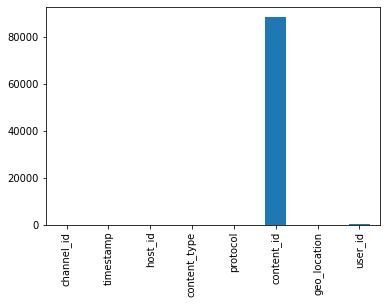

In [12]:
df.isnull().sum().plot.bar(x="Features", y="Missing Values")

### Number of unique values per feature

In [13]:
df.nunique()

channel_id          8
timestamp       52092
host_id           157
content_type        9
protocol            2
content_id         11
geo_location     1587
user_id            37
dtype: int64

In [14]:
df['content_id'].value_counts()

268.0     10
1145.0     4
2719.0     4
1460.0     1
180.0      1
2323.0     1
176.0      1
2800.0     1
2152.0     1
3634.0     1
1296.0     1
Name: content_id, dtype: int64

For each feature the number of unique values is relatively low, except for timestamp which means that most of our data don't arrive exactly at the same time and more interestingly for geo_location for which the number of unique values is slightly more important compared to the rest (even if 1587 unique values out of 88435 remains relatively limited).

### Correlation between features

,channel_id,host_id,content_type,protocol,content_id,geo_location,user_id
channel_id,1.000000,-0.803719,-0.188948,0.096096,0.316410,0.046855,-0.211252
host_id,-0.803719,1.000000,0.146870,-0.182326,NaN,-0.068876,0.266135
content_type,-0.188948,0.146870,1.000000,-0.226372,-0.704731,0.069411,-0.040964
protocol,0.096096,-0.182326,-0.226372,1.000000,NaN,0.151724,-0.725185
content_id,0.316410,NaN,-0.704731,NaN,1.000000,-0.678188,-0.080372
geo_location,0.046855,-0.068876,0.069411,0.151724,-0.678188,1.000000,-0.124943
user_id,-0.211252,0.266135,-0.040964,-0.725185,-0.080372,-0.124943,1.000000


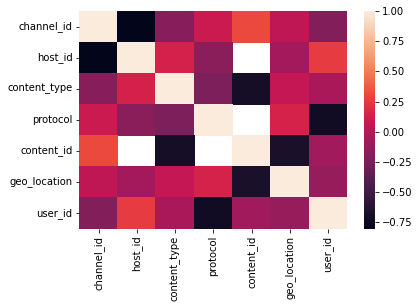

In [15]:
sns.heatmap(df.corr())
df.corr()